In [2]:
import matplotlib
import PIL
import scipy

In [61]:
from matplotlib import image as img
image = img.imread('/Users/mbagav200/Desktop/corporate_Official-Comcast-Logo.jpg')
image.shape

(900, 1600, 3)

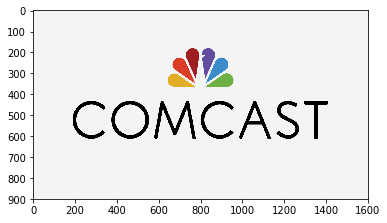

In [62]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.imshow(image)
plt.show()

In [63]:
r = []
g = []
b = []
for line in image:
    for pixel in line:
        temp_r, temp_g, temp_b = pixel
        r.append(temp_r)
        g.append(temp_g)
        b.append(temp_b)

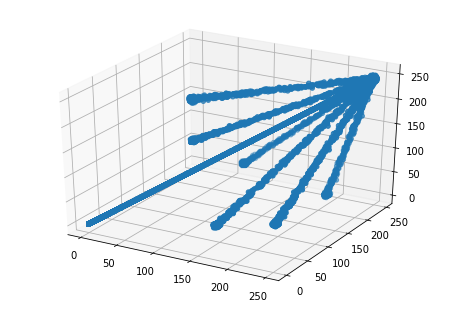

In [64]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(r, g, b)
plt.show()

In [65]:
import pandas as pd
df = pd.DataFrame({'red': r,
'blue': b,
'green': g})

In [67]:
from scipy.cluster.vq import whiten
df['scaled_red'] = whiten(df['red'])
df['scaled_blue'] = whiten(df['blue'])
df['scaled_green'] = whiten(df['green'])
df.sample(n = 10)

,blue,green,red,scaled_red,scaled_blue,scaled_green
1199202,244,244,244,5.097148,4.802109,4.926457
595507,244,244,244,5.097148,4.802109,4.926457
775692,244,244,244,5.097148,4.802109,4.926457
182901,244,244,244,5.097148,4.802109,4.926457
233951,244,244,244,5.097148,4.802109,4.926457
848322,244,244,244,5.097148,4.802109,4.926457
890315,244,244,244,5.097148,4.802109,4.926457
267509,244,244,244,5.097148,4.802109,4.926457
1209041,244,244,244,5.097148,4.802109,4.926457
854287,244,244,244,5.097148,4.802109,4.926457


In [72]:
from scipy.cluster.vq import kmeans
cluster_centers, distortion = kmeans(df[['scaled_red', 'scaled_green', 'scaled_blue']], 7)

In [73]:
print(cluster_centers)

[[5.09500864 4.92432115 4.79990255]
 [0.02758289 0.0266592  0.0259863 ]
 [2.990378   2.20712526 1.8498046 ]]


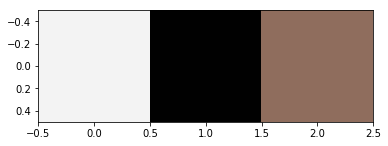

In [74]:
colors = []
r_std, g_std, b_std = df[['red', 'green', 'blue']].std()

for cluster_center in cluster_centers:
    scaled_r, scaled_g, scaled_b = cluster_center    
    colors.append((
    scaled_r * r_std / 255,
    scaled_g * g_std / 255,
    scaled_b * b_std / 255
    ))
plt.imshow([colors])
plt.show()